In [1]:
import os

import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib as mpl
import matplotlib.pyplot as plt

dataset_path = os.environ.get('RCMD_DATASET_PATH', '../dataset')
print('Dataset path', dataset_path)

Dataset path ../dataset


In [2]:
# MovieLens 100K를 데이터셋을 불러옵니다.
df_ratings = pd.read_csv(os.path.join(dataset_path, 'ratings_100k.csv'))
df_ratings['date'] = df_ratings.pop('timestamp').pipe(lambda x: pd.to_datetime(x, unit='s'))
df_user = pd.read_csv(os.path.join(dataset_path, 'users_100k.csv'), index_col='user id')
df_movie = pd.read_csv(os.path.join(dataset_path, 'movies_100k.csv'), index_col='movie id')

display(df_ratings.head())
display(df_user.head())
display(df_movie.head())

,user id,item id,rating,date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# 머신 러닝(기계 학습, Machine Learning)

**개요**

현재 거대 추천 시스템의 기반이 되는 행렬 요인화(Matrix Factorization) 과 딥러닝 기술을 보기에 앞서, 이 알고리즘의 배경이 되는 머신 러닝을 살펴 봅니다.

이 기술들의 기반이 되는 **모수적 모델**을 중심으로 대규모 모수적 모델을 학습하기 위한 도구인 Tensorflow의 역할과 사용법에 대하여 알아 봅니다.

**정의**

연산 장치(Computer)로 명시적인 알고리즘(특정 목적을 맞춘 컴퓨터 프로그래밍) 없이 데이터를 통해 성능을 향상시키는 방법을 연구하는 분야

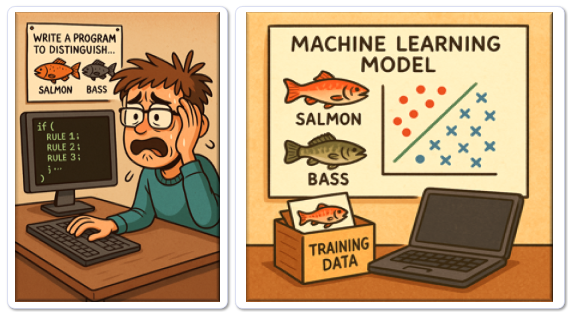

**fit(train)** → **predict(test) / transform(test)**

### 머신 러닝의 분류

#### 지도 학습
- 새로운 데이터에 대한 예측을 위해, 정답이 주어진 데이터에서 입력과 출력의 관계 학습
- 입력(X): 특징(Feature)
- 출력(Y): 정답(Target)
- 주요 과제(Task)

|   | 설명 | 예 |
| --- | --- | --- |
| 분류<br/>Classification | 정답이 범주형 | 웃음 or 비웃음, 우편번호 |
| 회귀<br/>Regression | 정답이 수치형 | 온도, 집값, 주가 |

#### 비지도 학습
- 데이터에서 구조와 패턴을 발견하여 대상을 효과적으로 설명하는 데이터를 출력
- 입력(X): 특징(Feature)
- 주요 과제(Task)

|   | 설명 | 예 |
| --- | --- | --- |
| 군집화<br/>Clustering | 유사한 데이터를 그룹화 | 고객 유형 분석 |
| 차원 축소<br/>Dimensionality Reduction | 고차원 데이터를 저차원으로 요약 | 이미지 픽셀 정보 압축 |

#### 강화 학습(Reinforcement Learning)
- 보상을 최대화하는 방향으로 학습

#### 준지도 학습(Semi-Supervised Learning)
- 일부만 정답이 있고 대부분 정답이 없는 데이터를 같이 활용하여 학습

### 머신 러닝 모델

- 데이터 속에 내재된 규칙성(패턴)을 연산 장치(Machine)에서 실행 가능한 형태로 구조화한 체계

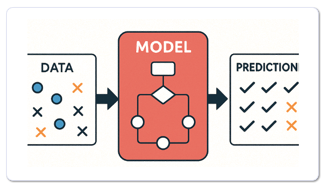

#### 모수적 모델(Parametric Model)
- 고정된 구조를 지닌 모델

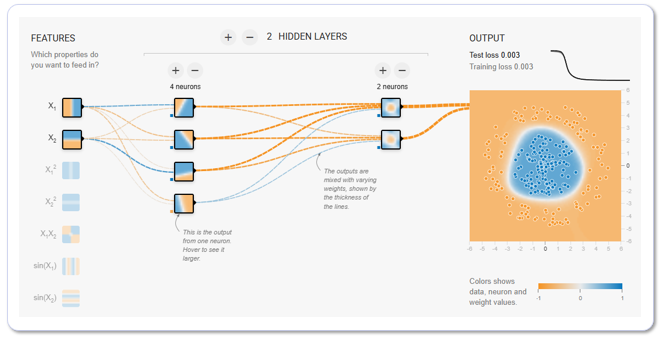

- 선형회귀 모델, 행렬 요인화(Matrix Factorization) 모델, 인공신경망, 나이브 베이즈

#### 비모수적 모델(Non-Parametric Model)

- 특정한 구조를 가정하지 않음
- 데이터로부터 직접 구조나 관계를 유추
- 의사결정나무, K-최근접 이웃, SVM(비선형 커널 SVM)

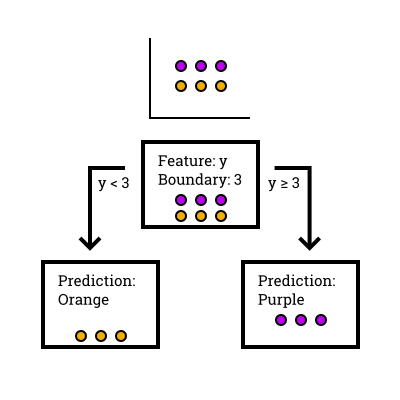


#### 특징 비교 

| 구분 | **모수적 모델 (Parametric Models)** | **비모수적 모델 (Non-parametric Models)** |
|------|:----------------------------------------|:-------------------------------------------|
| **모델 가정** | 데이터가 따르는 **함수 형태(모델 구조)**를 명시적으로 가정함 | 데이터의 구조에 대해 **구체적 가정 없이** 유연하게 모델링 |
| **함수 구조 필요 여부** | 구조를 특정할 수 있을 때 매우 강력<br>(예: 선형관계, 로지스틱 형태) | 구조를 모를 때 강력<br>(임의의 비선형 패턴 학습 가능) |
| **학습 데이터에 없는 패턴에 대한 성능** | 함수 구조가 맞으면 높은 정확도 유지 | **학습 데이터 주변에서만** 정확도 유지, 데이터 없는 영역은 신뢰도 낮음 |
| **샘플 효율 Sample Efficiency** | 적은 데이터로도 빠르게 안정된 학습 | 많은 데이터가 필요 (데이터가 복잡성을 직접 결정) |
| **해석 가능성** | 매우 높음 (기울기·절편 등) | 낮음 (트리 구조, 커널, 근접 이웃 등 복잡한 구조) |
| **대표 모델** | 선형회귀, 로지스틱 회귀, Naive Bayes, GLM 등 | 결정트리, 랜덤포레스트, kNN, SVM(RBF), 신경망 등 |

#### 장단점

| 구분 | **장점** | **단점** |
|------|:----------|:----------|
| **모수적 모델 (Parametric)** | - 빠른 학습<br>- 해석 용이<br>- 적은 데이터에서도 잘 작동<br>- 외삽 가능 | - 함수 형태 가정이 틀리면 성능 급락<br>- 복잡한 패턴 표현 어려움 |
| **비모수적 모델 (Non-parametric)** | - 유연성 높음<br>- 복잡한 비선형 패턴 학습 가능<br>- 모델링 가정이 거의 없음 | - 많은 데이터 필요<br>- 외삽 불가능<br>- 과적합 위험 높음<br>- 계산량 많음 |


#### 모수적 모델 VS. 비모수적 모델 비교 예제

In [3]:
import numpy as np
# 1. 데이터 준비
rng = np.random.RandomState(42)

# (1) 선형 관계 데이터: y = a x + b
n_samples_a = 80
X_a = np.linspace(-3, 3, n_samples_a).reshape(-1, 1)
y_a = 2 * X_a[:, 0] + 1 + rng.normal(scale=1.0, size=n_samples_a)  # y = 2x + 1 + noise

n_samples_b = 120
X_b = np.linspace(0, 10, n_samples_b).reshape(-1, 1)

# (2) 데이터셋 B: 계단형 관계

y_b_true = np.piecewise(
    X_b[:, 0],
    [X_b[:, 0] < 3,
     (X_b[:, 0] >= 3) & (X_b[:, 0] < 7),
     X_b[:, 0] >= 7],
    [0, 5, -3]
)
y_b = y_b_true + rng.normal(scale=0.6, size=n_samples_b)  # 약간의 노이즈 추가

from sklearn.model_selection import train_test_split

X_train_rand_a, X_test_rand_a, y_train_rand_a, y_test_rand_a = train_test_split(
    X_a, y_a, test_size=0.3, random_state=0
)

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X_b, y_b, test_size=0.3, random_state=0
)

# X를 기준으로 정렬
idx_sorted_a = np.argsort(X_a[:, 0])
X_a_sorted = X_a[idx_sorted_a]
y_a_sorted = y_a[idx_sorted_a]

idx_sorted = np.argsort(X_b[:, 0])
X_b_sorted = X_b[idx_sorted]
y_b_sorted = y_b[idx_sorted]

n_train_a = int(0.7 * n_samples_a)
X_train_x_a = X_a_sorted[:n_train_a]
y_train_x_a = y_a_sorted[:n_train_a]
X_test_x_a = X_a_sorted[n_train_a:]
y_test_x_a = y_a_sorted[n_train_a:]

n_train = int(0.7 * n_samples_b)  # 앞 70%를 train, 뒤 30%를 test
X_train_x = X_b_sorted[:n_train]
y_train_x = y_b_sorted[:n_train]
X_test_x = X_b_sorted[n_train:]
y_test_x = y_b_sorted[n_train:]

In [4]:
from sklearn.model_selection import train_test_split

X_train_rand_a, X_test_rand_a, y_train_rand_a, y_test_rand_a = train_test_split(
    X_a, y_a, test_size=0.3, random_state=0
)

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X_b, y_b, test_size=0.3, random_state=0
)

# X를 기준으로 정렬
idx_sorted_a = np.argsort(X_a[:, 0])
X_a_sorted = X_a[idx_sorted_a]
y_a_sorted = y_a[idx_sorted_a]

idx_sorted = np.argsort(X_b[:, 0])
X_b_sorted = X_b[idx_sorted]
y_b_sorted = y_b[idx_sorted]

n_train_a = int(0.7 * n_samples_a)
X_train_x_a = X_a_sorted[:n_train_a]
y_train_x_a = y_a_sorted[:n_train_a]
X_test_x_a = X_a_sorted[n_train_a:]
y_test_x_a = y_a_sorted[n_train_a:]

n_train = int(0.7 * n_samples_b)  # 앞 70%를 train, 뒤 30%를 test
X_train_x = X_b_sorted[:n_train]
y_train_x = y_b_sorted[:n_train]
X_test_x = X_b_sorted[n_train:]
y_test_x = y_b_sorted[n_train:]

In [5]:
# 2. 모델 학습
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# 랜덤 분할 모델
lin_rand_a = LinearRegression().fit(X_train_rand_a, y_train_rand_a)
tree_rand_a = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train_rand_a, y_train_rand_a)

lin_rand = LinearRegression()
tree_rand = DecisionTreeRegressor(max_depth=3, random_state=42)

lin_x_a = LinearRegression().fit(X_train_x_a, y_train_x_a)
tree_x_a = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train_x_a, y_train_x_a)

lin_rand.fit(X_train_rand, y_train_rand)
tree_rand.fit(X_train_rand, y_train_rand)

# X 기준 분할 모델
lin_x = LinearRegression()
tree_x = DecisionTreeRegressor(max_depth=3, random_state=42)

lin_x.fit(X_train_x, y_train_x)
tree_x.fit(X_train_x, y_train_x)

X_plot_a = np.linspace(-3, 3, 400).reshape(-1, 1)

y_pred_rand_lin_a = lin_rand_a.predict(X_plot_a)
y_pred_rand_tree_a = tree_rand_a.predict(X_plot_a)

y_pred_x_lin_a = lin_x_a.predict(X_plot_a)
y_pred_x_tree_a = tree_x_a.predict(X_plot_a)

X_plot = np.linspace(0, 10, 400).reshape(-1, 1)

y_rand_lin_pred = lin_rand.predict(X_plot)
y_rand_tree_pred = tree_rand.predict(X_plot)

y_x_lin_pred = lin_x.predict(X_plot)
y_x_tree_pred = tree_x.predict(X_plot)

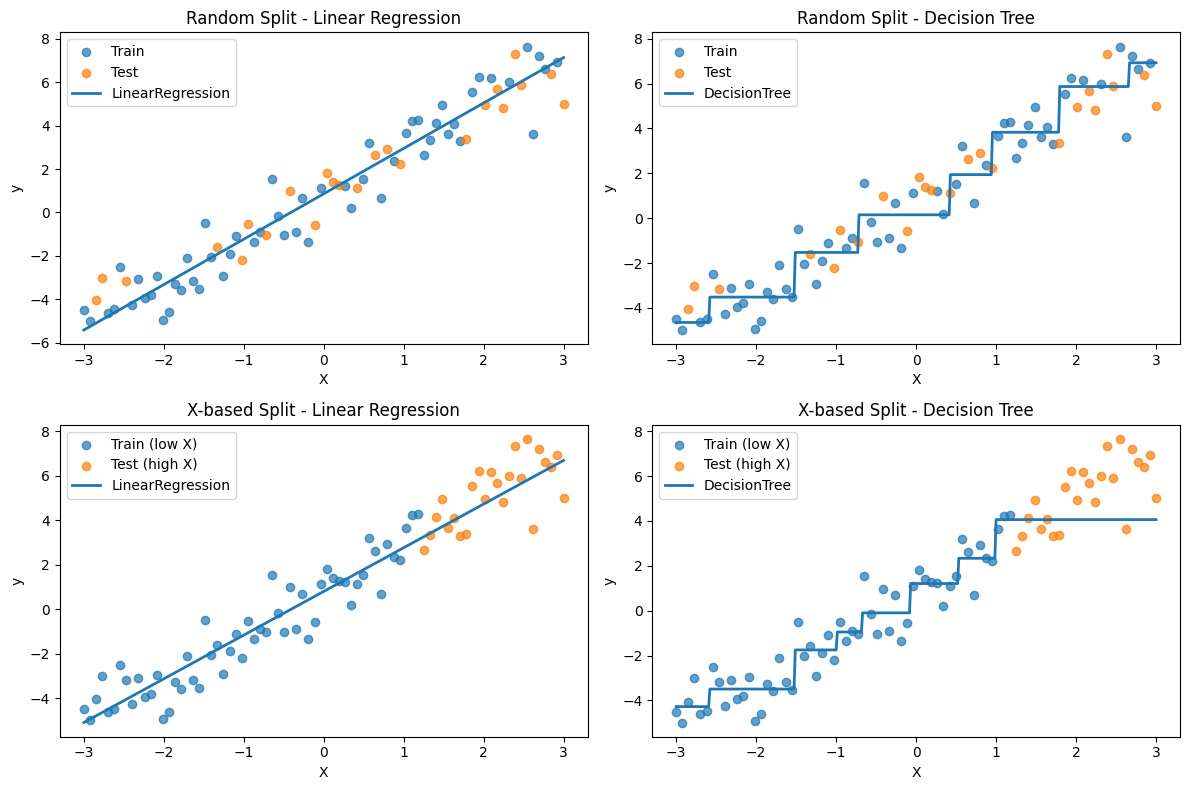

In [6]:
plt.figure(figsize=(12, 8))

# ------------------ (1) 랜덤 분할 — Linear Regression ------------------
plt.subplot(2, 2, 1)
plt.scatter(X_train_rand_a, y_train_rand_a, label="Train", alpha=0.7)
plt.scatter(X_test_rand_a, y_test_rand_a, label="Test", alpha=0.7)
plt.plot(X_plot_a, y_pred_rand_lin_a, label="LinearRegression", linewidth=2)
plt.title("Random Split - Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# ------------------ (2) 랜덤 분할 — Decision Tree ------------------
plt.subplot(2, 2, 2)
plt.scatter(X_train_rand_a, y_train_rand_a, label="Train", alpha=0.7)
plt.scatter(X_test_rand_a, y_test_rand_a, label="Test", alpha=0.7)
plt.plot(X_plot_a, y_pred_rand_tree_a, label="DecisionTree", linewidth=2)
plt.title("Random Split - Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# ------------------ (3) X 기준 분할 — Linear Regression ------------------
plt.subplot(2, 2, 3)
plt.scatter(X_train_x_a, y_train_x_a, label="Train (low X)", alpha=0.7)
plt.scatter(X_test_x_a, y_test_x_a, label="Test (high X)", alpha=0.7)
plt.plot(X_plot_a, y_pred_x_lin_a, label="LinearRegression", linewidth=2)
plt.title("X-based Split - Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# ------------------ (4) X 기준 분할 — Decision Tree ------------------
plt.subplot(2, 2, 4)
plt.scatter(X_train_x_a, y_train_x_a, label="Train (low X)", alpha=0.7)
plt.scatter(X_test_x_a, y_test_x_a, label="Test (high X)", alpha=0.7)
plt.plot(X_plot_a, y_pred_x_tree_a, label="DecisionTree", linewidth=2)
plt.title("X-based Split - Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()


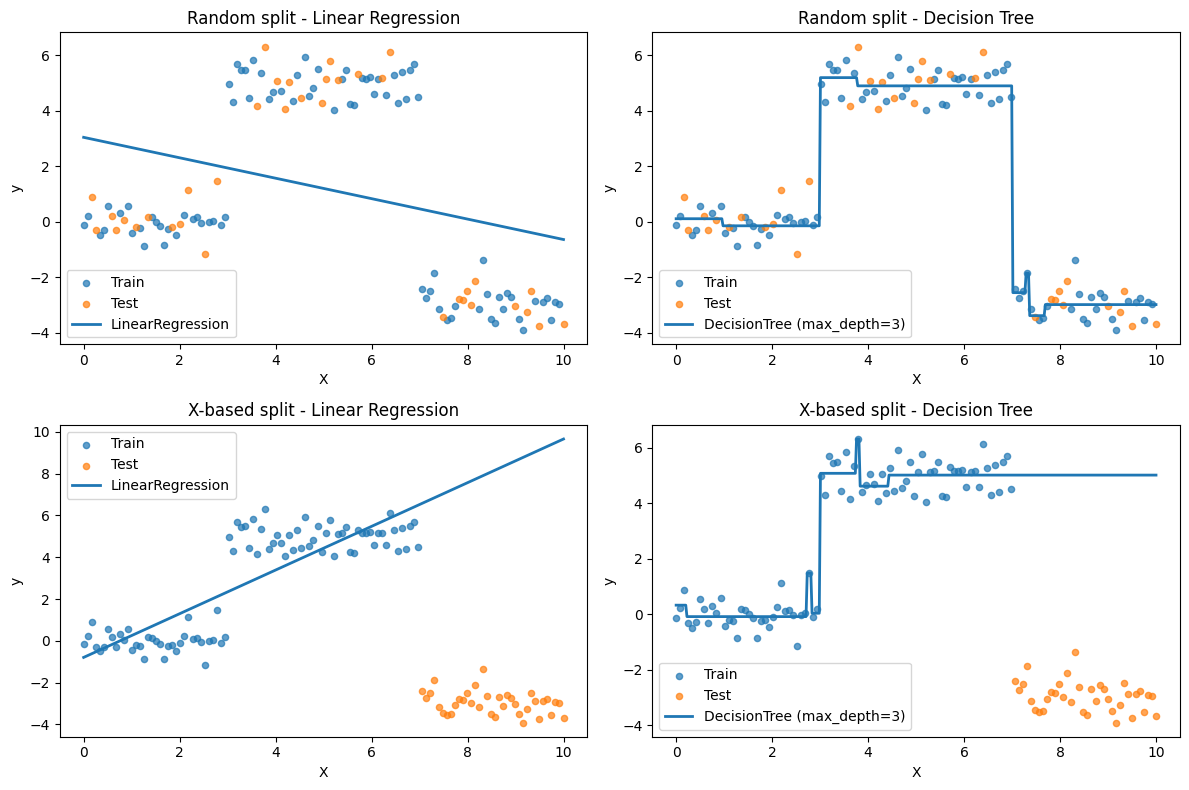

In [7]:
plt.figure(figsize=(12, 8))

# ------------------ (1) 랜덤 분할 ------------------
plt.subplot(2, 2, 1)
plt.scatter(X_train_rand, y_train_rand, s=20, alpha=0.7, label="Train")
plt.scatter(X_test_rand, y_test_rand, s=20, alpha=0.7, label="Test")
plt.plot(X_plot, y_rand_lin_pred, label="LinearRegression", linewidth=2)
plt.title("Random split - Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_train_rand, y_train_rand, s=20, alpha=0.7, label="Train")
plt.scatter(X_test_rand, y_test_rand, s=20, alpha=0.7, label="Test")
plt.plot(X_plot, y_rand_tree_pred, label="DecisionTree (max_depth=3)", linewidth=2)
plt.title("Random split - Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# ------------------ (2) X 기준 분할 ------------------
plt.subplot(2, 2, 3)
plt.scatter(X_train_x, y_train_x, s=20, alpha=0.7, label="Train")
plt.scatter(X_test_x, y_test_x, s=20, alpha=0.7, label="Test")
plt.plot(X_plot, y_x_lin_pred, label="LinearRegression", linewidth=2)
plt.title("X-based split - Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_train_x, y_train_x, s=20, alpha=0.7, label="Train")
plt.scatter(X_test_x, y_test_x, s=20, alpha=0.7, label="Test")
plt.plot(X_plot, y_x_tree_pred, label="DecisionTree (max_depth=3)", linewidth=2)
plt.title("X-based split - Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# 2. 모델 학습
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# 랜덤 분할 모델
lin_rand_a = LinearRegression().fit(X_train_rand_a, y_train_rand_a)
tree_rand_a = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train_rand_a, y_train_rand_a)

lin_rand = LinearRegression()
tree_rand = DecisionTreeRegressor(max_depth=3, random_state=42)

lin_x_a = LinearRegression().fit(X_train_x_a, y_train_x_a)
tree_x_a = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train_x_a, y_train_x_a)

lin_rand.fit(X_train_rand, y_train_rand)
tree_rand.fit(X_train_rand, y_train_rand)

# X 기준 분할 모델
lin_x = LinearRegression()
tree_x = DecisionTreeRegressor(max_depth=3, random_state=42)

lin_x.fit(X_train_x, y_train_x)
tree_x.fit(X_train_x, y_train_x)

X_plot_a = np.linspace(-3, 3, 400).reshape(-1, 1)

y_pred_rand_lin_a = lin_rand_a.predict(X_plot_a)
y_pred_rand_tree_a = tree_rand_a.predict(X_plot_a)

y_pred_x_lin_a = lin_x_a.predict(X_plot_a)
y_pred_x_tree_a = tree_x_a.predict(X_plot_a)

X_plot = np.linspace(0, 10, 400).reshape(-1, 1)

y_rand_lin_pred = lin_rand.predict(X_plot)
y_rand_tree_pred = tree_rand.predict(X_plot)

y_x_lin_pred = lin_x.predict(X_plot)
y_x_tree_pred = tree_x.predict(X_plot)

**심층신경망**: 모수적 모델의 한계점과 비모수적 모델의 한계점을 **연산력**과 **데이터의 양**으로 극복을 위한 모델

> 한계점: 연산력과 데이터의 양이 부족할 때는 성능을 내기 힘듦

## 손실(Loss)

**근사화**에 의해 발생한 실제 데이터와의 오차를 정량화


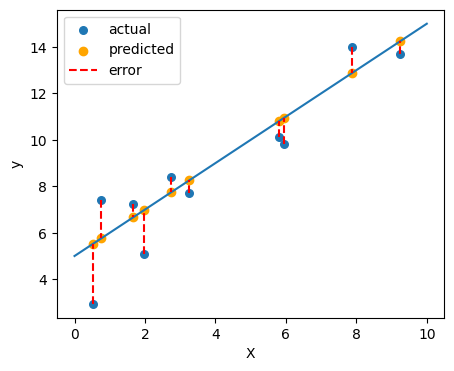

In [9]:
a, b= 1, 5
X = np.random.random(size=100) * 10
y = X * a + b + np.random.normal(size=100)

idx_10 = np.random.choice(np.arange(100), 10)
X, y = X[idx_10], y[idx_10]
plt.figure(figsize=(5, 4))
plt.plot((0, 10), (a * 0 + b, a * 10 + b))
plt.scatter(X, y, s=30, label='actual')
plt.scatter(X, X * a + b, color='orange', label='predicted')
plt.vlines(X, y, X * a + b, linestyles='dashed', color='red', label='error')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.legend()
plt.show()

### 학습 (Train)

데이터의 **손실**을 최소화 시키도록 모델을 찾는 과정입니다.

### 손실의 종류

#### 회귀 (Regression)

- 정답이 수치형

- 손실: Mean Squared Error

  > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$

Ex) 사용자의 아이템에 대한 평점을 예측

#### 분류 (Classfication)

- 정답이 범주

- 손실: Cross Entropy 

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  이진분류일 경우 다음과 같이 축약할 수 있습니다.

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

Ex) 사용자가 아이템을 좋아요/싫어요 피드백을 예측

#### 군집화

 > $\text{Sum of Squared Errors(SSE)} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

### 성능 지표(Performance Metric)

- 머신러닝 모델을 평가하는 기준

- Metric과 Loss는 같을 수도 있고, 다를 수도 있습니다. 
  
  Metric과 Loss가 다른 과제는 Loss를 낮추는 것이 Metric을 낮추는 것을 보장하지 않기 때문에 이 갭을 메꾸기 위한 방법이 필요합니다.

#### 회귀

  - Mean Squared Error(MSE)
  
    > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
    
  - Mean Absolute Error(MAE)
  
    > $MAE = \frac{1}{n}\sum_{i=1}^{n}|\left(y_i - \hat{y}_i)\right|$
    
  - R2 Score
  
    > $R^2 = 1 - \frac{MSE}{VAR(y)}$
  
#### 분류

  - 정확도(Accuracy)
    
    > $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
  
  - 정밀도(Precision)
  
    > $Precision = \frac{TP}{TP + FP}$
  
  - 재현율(Recall)
    
    > $Recall = \frac{TP}{TP + FN}$


## 모수적 모델(Parametric Model)

> 모집단의 지식(패턴)을 **고정된 함수 구조**로 나타내는 모델

- Ex) 선형 모델, 신경망 모델, Naive Bayes 모델, Matrix Factorization

- 학습: 학습 데이터를 통해 함수의 모수를 추정하는 것

  ⇒  학습 데이터에 대한 모델의 손실을 최소화하는 모수를 찾는 것

### 선형 회귀 모델(Linear Regression)

대상 변수를 선형 함수로 나타낸 모델

$\hat{y_i} = \hat{\beta}_1x_{i1} + \hat{\beta}_2x_{i2} + ... + \hat{\beta}_nx_{in} + \hat{\beta}_0$

≡ $\hat{y} = X \hat{\beta} + \hat{\beta}_0$

**학습 알고리즘**

  1.정규방정식(OLS, Ordinary Least Square)
  
  정규방정식의 해 아래와 같이 닫힌 형태로 구할 수 있습니다.
  
  $\hat{\beta} = (X^T X)^{-1} X^T y$
  
  2.경사하강법(Gradient Descent)
  
  - 손실(Loss)에 대한 모수의 기울기(Gradient)를 측정하여 손실(Loss)을 낮추는 방향으로 모수를 찾아가는 방법
  
  $Loss = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
  
  $\nabla_{\hat{\beta}} Loss = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

#### **예제: 선형회귀 모델의 학습**

In [10]:
from sklearn.datasets import make_regression

# 예제로 사용할 데이터셋을 만듭니다.
X, y = make_regression(
    n_samples=100, 
    n_features=1,  # 입력 변수는 한 개로 합니다,
    n_informative=1, 
    noise=4.0,
    bias=1.0, 
    random_state=123
)

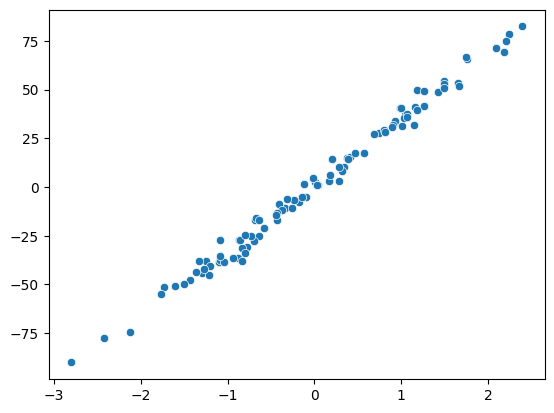

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 변수와 대상 변수를 산포도 그래프로 출력합니다.
sns.scatterplot(x = X[:, 0], y = y)
plt.show()

**Task** 

위 데이터는 입력 데이터는 한 개, 출력 데이터는 한 개인 선형 관계를 지닌 데이터 입니다.

이 데이터가 절편이 있는 선형 회귀 모델을 따른다는 것을 아래와 같이 가정합니다.

$ y = \beta_1 x + \beta_0$

모수적 모델의 학습 함수의 계수들을 구하는 것입니다.

손실 함수가 Mean Squared Error 일 때, 위 데이터를 학습해봅니다.

**1. 정규방정식 (Ordinary Least Square, OLS)**

2차 방정식의 근의 공식이 있듯이, 선형 회귀 모델의 계수를 구하는 것은 공식화 되었습니다. 

이 공식을 바로 정규방정식이라고 합니다.

$\hat{\beta} = (X^T X)^{-1} X^T y$

In [12]:
# Linear Regression의 상수항(beta_hat_0)을 행렬연산에 포함시켜 구하기 위해 모두 1인 입력변수를 추가합니다.
X_1 = np.hstack([X, np.ones((X.shape[0], 1))])
# 처음 5행만 출력합니다.
X_1[:5]

array([[-0.09470897,  1.        ],
       [-1.25388067,  1.        ],
       [ 0.00284592,  1.        ],
       [ 1.03972709,  1.        ],
       [-0.43435128,  1.        ]])

In [13]:
np.dot(X_1.T, y)

array([4321.15252835,  188.4220333 ])

In [14]:
# OLS를 통한 Linear Regression 모델 학습
X_gram = np.dot(X_1.T, X_1)  # X_1^T, X_1 행렬곱을 합니다.
X_gram_inv = np.linalg.inv(X_gram) # X_gram의 역행렬을 구합니다.
beta_hat = np.dot(X_gram_inv, np.dot(X_1.T, y)) # beta_hat을 구합니다.
beta_hat

array([33.9064697 ,  0.96504735])

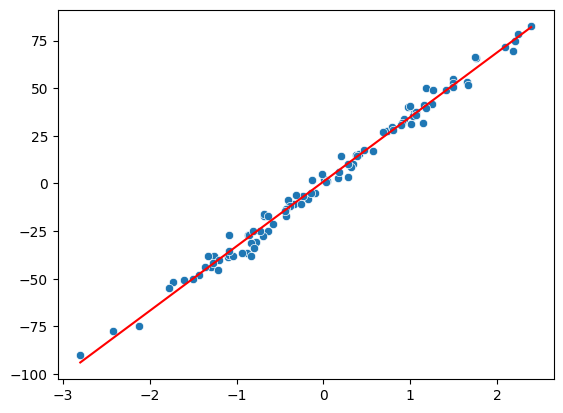

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def linear_reg(X_1, beta_hat):
    """
    학습을 통해 도출한 beta_hat으로 y값 예측합니다.
    """
    return np.dot(X_1, beta_hat)

def plot_linear_model(x_min, x_max, beta_hat, **kwarg):
    """
    beta_hat의 회귀선을 출력합니다.
    """
    x_range = np.array([
        [x_min, 1], 
        [x_max, 1]
    ])
    sns.lineplot(x=x_range[:, 0], y=linear_reg(x_range, beta_hat), **kwarg)
    
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

**2. 경사하강법(Gradient Descent)**

근의 공식은 2차 방정식에

정규 방정식은 선형회귀 모델에만 사용할 수 있는 학습 방법입니다.

선형 회귀 모델을 뿐만 아니라 모수와 손실간의 경사도를 계산할 수 있는 모수적 모델에 적용 가능한,

간단히 말해 보다 다양한 모수적 모델에 적용이 가능한 경사하강법을 소개합니다.

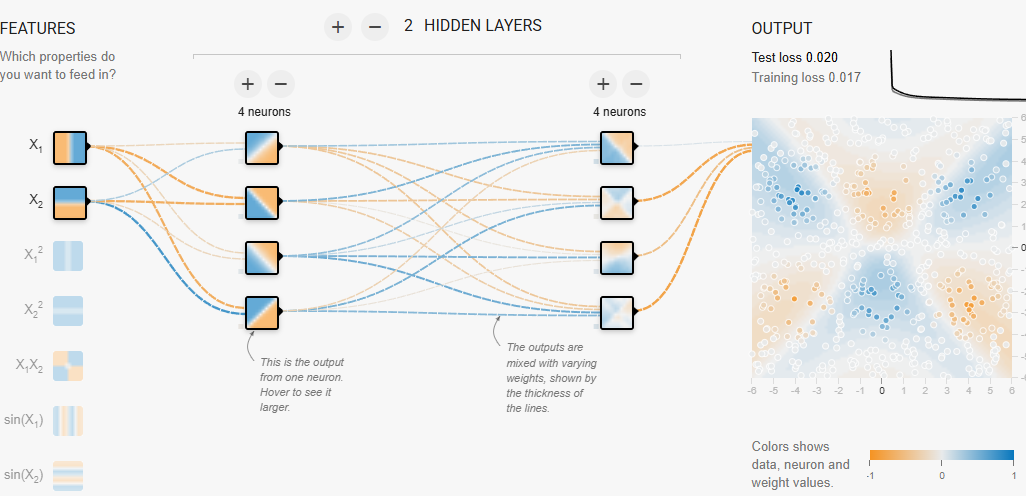

출처 : https://playground.tensorflow.org/

**Step.1** 

모수 초기화

In [16]:
# 초기화: (-1, 1) 사이의 임의의 2개의 실수를 만듭니다.
beta_hat = np.random.uniform(-1, 1, 2)
beta_hat

array([0.96129823, 0.63571491])

**Step 2**

$\nabla_{\hat{\beta}} Loss = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

손실에 대한 회귀 계수의 미분을 이용한 경사(기울기)를 계산하여 손실이 줄어드는 방향으로

계수를 업데이트하여 선형 회귀 모델의 계수 (선형 회귀 계수)를 구해봅니다.

In [17]:
# 먼저 y_hat: 예측값을 구해봅니다.
y_hat = np.dot(X_1, beta_hat)
y_hat

array([ 0.54467135, -0.56963836,  0.63845068,  1.63520272,  0.2181738 ,
       -0.51620986, -1.69704755,  0.02153955,  1.99816197,  0.07950751,
       -0.02649363, -0.10708861,  1.5272829 ,  1.76603729,  0.79379197,
        1.5765721 , -0.01689715,  0.67944444, -0.16327291, -0.20978182,
        1.60091014, -0.41902444,  2.32268389,  0.25994363,  2.07347497,
        0.46879923, -1.4052177 , -0.26390053,  0.96119996, -0.19748111,
       -0.19268855, -0.03707584,  2.73786851,  0.82751705,  1.50771353,
        0.62434228,  2.78723814, -0.40816115, -0.0683995 ,  2.22323793,
       -0.36287036, -1.02509072, -0.60828702,  2.64205329,  1.00043205,
        0.31366966,  2.06938512,  1.03264664,  0.93782402,  0.90836535,
        1.18731347,  2.9354914 , -0.13146139,  1.84237238,  0.66424935,
        0.41164392, -0.1384825 ,  1.85265719,  0.24795985, -0.67498787,
        1.7529396 ,  0.5010671 ,  0.02264552, -0.40789987,  1.49194939,
        1.62692341,  0.80974366,  1.34454602, -0.63922173,  1.00

In [18]:
np.sum(np.expand_dims((y - y_hat), axis = -1) * X_1, axis = 0)

array([4196.99231333,  122.24455192])

$\sum_{i=1}^{n}{a_i b_i} = a \cdot b$ 임을 이용하여 연산을 줄여 봅니다.

In [19]:
np.dot(y - y_hat, X_1)

array([4196.99231333,  122.24455192])

$\nabla_{\hat{\beta}} Loss = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

In [20]:
beta_hat_grad = np.dot(y - y_hat, X_1) / y.shape[0] * -2
beta_hat_grad

array([-83.93984627,  -2.44489104])

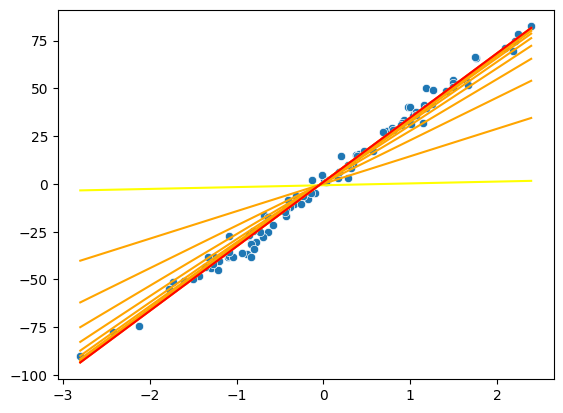

In [21]:
beta_hat = np.random.uniform(-1, 1, 2) #  -1, 1 사이의 임의 수 2개를 생성합니다.
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='yellow')

learning_rate = 0.02 # 학습율(속도)
# Epoch마다 손실(loss)을 기록하기 위한 리스트
losses = []
for epoch in range(100):
    y_hat = np.dot(X_1, beta_hat) # 현재 회귀 계수의 X_1에 대한 예측 값을 구합니다.
    beta_hat_grad = np.dot(y - y_hat, X_1) / y.shape[0] * -2 # 회귀 계수들의 경사도를 구합니다.

    # Step 3 하강
    beta_hat -= beta_hat_grad * learning_rate # 회귀 계수를 업데이트 합니다.
    
    # 10 epoch 마다 회귀선을 출력합니다.
    if (epoch + 1) % 10 == 0:
        plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='orange')

    loss = np.mean((y_hat - y) ** 2)# Loss Function: Mean Squared Error를 계산합니다.
    
    losses.append(loss)
# 최종 학습된 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

In [22]:
beta_hat

array([33.73007648,  0.97479371])

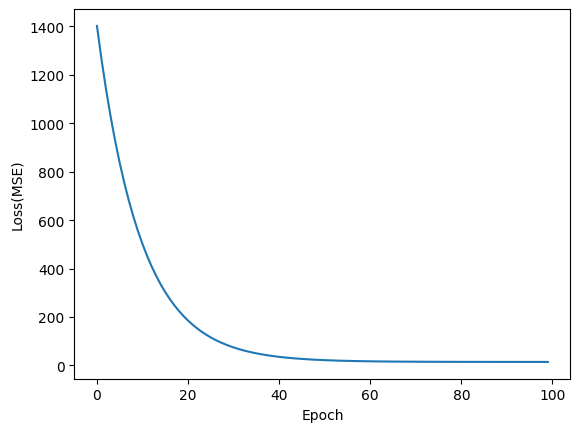

In [23]:
# 경사하강법의 반복횟수(Epoch)에 따른 손실을 출력합니다.
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

#### 학습 알고리즘 정리

|   | 수식 기반 추정<br/>(Closed-Form Solution Estimation) | 최적화 알고리즘 기반 추정<br/>(Optimization-Based Estimation) |
| --- | --- | --- |
| 기본 개념 | 수식으로 가중치를 직접 계산 | 손실이 감소하는 방향으로 반복적 가중치 갱신 |
| 대표 알고리즘 | 정규 방정식 | 경사 하강법 |
| 장점 | 고정된 결과를 얻을 수 있음 | 높은 범용성<br/>점진적 학습 가능 |
| 단점 | 사용할 수 있는 모델이 제한적임 | 최적화 알고리즘 튜닝 필요<br/>초기값 설정에 따라 성능 차이가 있음 |
| 활용 모델 | 선형회귀 모델, Ridge 회귀 모델, … | 선형회귀 모델, 인공신경망, … |


### Tensorflow

**Tensor란?**

n차원 배열 (n이 0이면 단일수, n이 1이면 Vector, n이 2이면 Matrix, n이 3이면 Cube, ...

머신러닝 관점에서 Tensorflow를 한 마디로, 모수적 모델을 구현하기 위한 라이브러리입니다.

Matrix Factorization, 딥러닝은 모수적 모델입니다. 

이 후 파트에서는 Tensorflow를 통한 모델링 학습이 주를 이룹니다.

이를 위해 Tensorflow에 익숙해져 보기 위해 예를 들어 봅니다.

모수(Parameter)라는 단어는 통계 분야에서 주로 사용한 단어입니다. 

Machine Learning에서는 모수(Parameter)보다는 **가중치(Weight)** 를 주로 사용합니다.

Tensorflow에서는 가중치(Weight)라는 단어를 사용합니다. 여기서 부터는 모수(Parameter)를 가중치(Weight)로

사용하도록 하겠습니다.

In [24]:
# TF_CPP_MIN_LOG_LEVEL: Tensorflow에서 출력할 로그의 수준을 지정합니다. 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

# 불필요한 경고 메세지가 너무 많이 나와서 내용 파악에 어려움이 있어
# Tensorflow에서 출력하는 경고 메세지를 보이지 않게 조정합니다.
# 개발 단계에서는 비활성화 시키지 않는 것을 권장드립니다. 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

In [25]:
# 장치의 GPU 현황을 조사합니다.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

2025-12-23 07:28:08.052919: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


**단일 변수 회귀 모델을 밀도층으로 모델링**

딥러닝 툴인 Tensorflow로 단일 회귀 모델을 나타내는 가장 간단한 방법은

딥러닝의 밀도 레이어를 사용하면 됩니다.

입력의 수가 1개이고 출력의 수가 한 개인 단일 밀도층으로 구성된 모델이 바로

밀도층으로 구현한 선형 회귀 모델입니다.

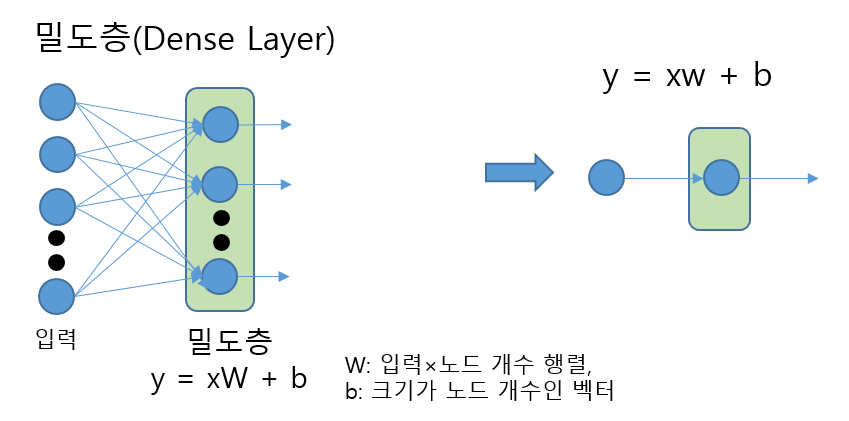

In [26]:
# Tensorflow로 선형회귀 모델(Linear Regression Model)을 정의합니다.
class LRModel(tf.keras.Model):
    def  __init__(self):
        super().__init__()
        # 출력이 한 개인 밀도 레이어 단층의 신경망
        # Dense Layer에는 입력변수 × 출력변수 형태의 가중치 행렬(Weight Matrix)와 절편(Intercept)이 있습니다.
        # 출력 변수가 1개인 Dense Layer를 생성합니다.
        self.beta_hat = tf.keras.layers.Dense(1)

    def call(self, X):
        y_hat = self.beta_hat(X) # X를 beta_hat Layer에 통과 시켜 예측값을 구합니다.
        return y_hat

# Tensorflow 세션 초기화
tf.keras.backend.clear_session()
# 모델 생성합니다. 
lr_model = LRModel()

In [27]:
# 모델의 구동을 확인해봅니다.
lr_model(X[:5])

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-0.08658405],
       [-1.1463122 ],
       [ 0.00260177],
       [ 0.9505306 ],
       [-0.39708897]], dtype=float32)>

In [28]:
# Dense Layer의 가중치 곧 선형 회귀 모델 관점에서 모수를 확안해 봅니다.
lr_model.beta_hat.get_weights()

[array([[0.91421163]], dtype=float32), array([0.], dtype=float32)]

In [29]:
# Dense Layer의 Weight는  입력 텐서[-1] x 출력 텐서[-1]의 weight와 출력 텐서[-1]의 절편으로 구성 돼있습니다.
lr_model.beta_hat.get_weights()[0] * X[:5] + lr_model.beta_hat.get_weights()[1]

array([[-0.08658404],
       [-1.14631229],
       [ 0.00260177],
       [ 0.9505306 ],
       [-0.39708899]])

In [30]:
lr_model.summary()

Model: "lr_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (5, 1)                 │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**Keras**

Deep Learning Framework - Deep Learning을 위한 요소들을 틀로써 정의

**학습 방법 1: Train Loop를 통한 학습**

In [31]:
# 손실함수를 생성합니다. Mean Squared Error(MSE)
mse = tf.keras.losses.MeanSquaredError()
# 옵티마이저(손실함수를 낮추는 가중치(Weight)를 찾아주는 모듈)을 생성합니다.: Adaptive Gradient Descent 최적화기
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 2.0) # 학습율을 2.0로 설정합니다.
@tf.function
def train_step(X, y):
    # 모델에서 예측값을 구하고, 예측값과 실제값의 손실을 구하는 과정을 tape 객체에 담습니다. 이를 통해 경사도가 계산됩니다.
    with tf.GradientTape() as tape:
        y_hat = lr_model(X)
        loss = mse(y, y_hat)
    # 모델에서 학습 가능한 가중치를 가져옵니다.
    variables = lr_model.trainable_variables
    # 가중치에 대한 경사도를 구합니다.
    gradients = tape.gradient(loss, variables)
    # 구한 기울기를 가지고 가중치를 업데이트합니다
    optimizer.apply_gradients(zip(gradients, variables))
    return loss

**Auto Diff.** :머신 러닝 관점에서 Tensorflow의 핵심 기능 모델의 계수(가중치, Weight)들의 손실에 대한 경사도를 구해줍니다.

**Tensorflow의 모델 구동 방식**

- Eager Execution - 즉각적으로 실행

- Graph Execution - Graph로 단계들을 구성하여 최적화하여 실행

@tf.function - 지정한 함수안에 연산들을 Graph Execution 방법으로 구동 시키도록합니다.

**Batch** - 데이터를 지정한 숫자 만큼을 나누어 전달토록 합니다.

> 전체 데이터에서 Batch 단위로 나누어 Gradient를 구합니다.
>
> 안정적인 학습을 할 수 있는 충분한 수의 Batch를 연산 장치가 수용할 수 있다면,
> 
> 저장 장치가 허용하는 만큼의 데이터를 학습시킬 수 있습니다.

- 모델의 복잡도가 클수록 많은 큰 사이즈의 Batch가 필요

- 데이터의 복접도가 클수록 많은 큰 사이즈의 Batch가 필요

In [32]:
# Tensorflow 용 Dataset으로 만들어 줍니다. # batch - 64개
ds = tf.data.Dataset.from_tensor_slices((X, y)).batch(64)
losses = []
for epoch in range(100):
    losses_epoch = []
    for X_, y_ in ds:
        losses_epoch.append(
            train_step(X_, y_) # train_step을 수행하고 손실함수를 기록합니다.
        )
    losses.append(np.mean(losses_epoch))

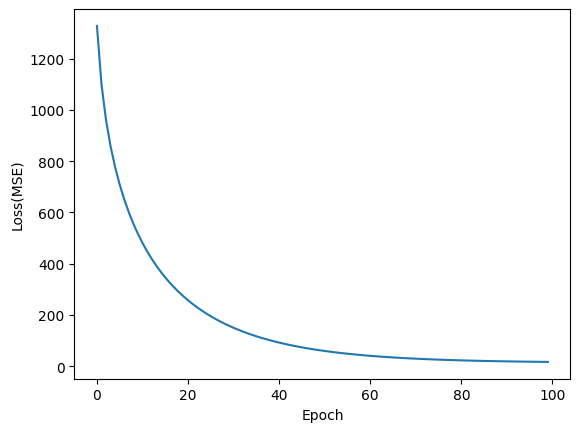

In [33]:
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

In [34]:
# Dense Layer의 가중치 곧 선형 회귀 모델 관점에서 모수를 확안해 봅니다.
lr_model.beta_hat.get_weights() # 33.88429722 / 0.97382454

[array([[32.157486]], dtype=float32), array([1.0976832], dtype=float32)]

**학습 방법 2: fit 메소드를 통한 학습**

compile ~ fit 루틴

compile: 모델 학습에 필요한 설정을 합니다.

fit: 데이터셋에 대한 학습 작업을 수행시킵니다.

In [35]:
# lr_model을 학습하기 위한 설정을 합니다.
lr_model = LRModel()

lr_model.compile(
    # 경사하강 알고리즘을 셋팅합니다: Adaptive Gradient Descent, learing_rate = 2.0
    optimizer = tf.keras.optimizers.Adagrad(learning_rate = 2.0), 
    loss= tf.keras.losses.MeanSquaredError(), # 손실함수를 설정합니다. MeanSquredError, MSE
    metrics=[tf.keras.metrics.MeanSquaredError(name = 'mse')] # mse: Mean Squared Error 모델 성능 측정지표를 성정합니다.
)

# epochs: 최적화 루팅 반복 회수, 100회
# verbose: 0 - 중간 결과 출력을 생략합니다.
# 학습을 시킵니다.
hist = lr_model.fit(ds, epochs = 100, verbose = 0)

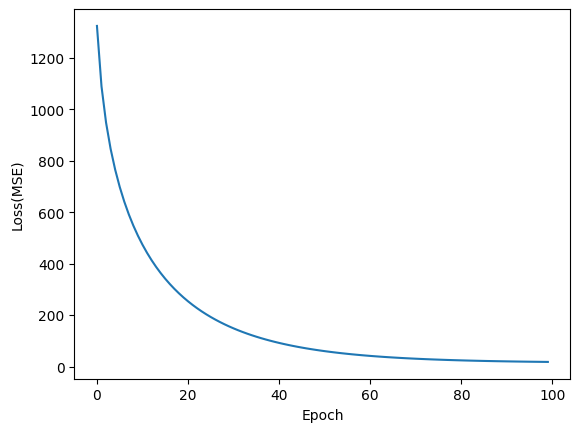

In [36]:
sns.lineplot(hist.history['mse'])
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

**Gradient Descent의 의미**

1. **Loss에 대한 모수의 기울기만 구할 있다면**,  모든 모수 모델에 대하여 적용이 가능합니다.

2. **데이터 스트림을 통한 학습**이 가능합니다. 

  > 모델 학습 시 전체 데이터를 메모리에 올리지않고, 학습에 필요한 Batch 단위로 나누어 진행합니다.
  >
  > 대규모의 학습 데이터를 입력으로 사용 가능합니다.


## 기계학습의 궁극 목표

- 실제 투입이 되었을 때 성능이 좋은 머신러닝 모델을 만드는 것 → **일반화(Generalization)**

  > 학습 데이터를 통해 일반화(Generalized)된 머신러닝 모델을 만드는 것
  >
  > **과적합(Over-fit)**: 학습데이터에 모델이 지나치게 맞추어져 학습데이터에 치우침에 의해 일반성을 잃어 버린 상태입니다.
  >
  > **과소적합(Under-fit)**: 학습데이터에 모델이 덜 맞추어져 현상을 제대로 모델이 담지 못하여 낮은 일반성을 지닌 상태입니다.

#### 과소적합(Under-Fitting)과 과대적합(Over-Fitting)

| 방식 | 과소적합<br/>Under-Fitting | 과대적합<br/>Over-Fitting |
| --- | --- | --- |
| 정의 | 모델이 학습 데이터에 충분히 맞춰지지 않아 일반화 성능이 떨어진 상태 | 모델이 과도하게 학습 데이터에 치우쳐 일반화 성능이 떨어진 상태 |
| 원인 | 모델의 표현력 부족<br/>학습 수행 과정 생략 | 모델의 표현력 과다<br/>학습데이터의 노이즈<br/>학습 데이터 부족 |
| 특징 | 학습 성능 ↓<br/>검증 성능 ↓ | 학습 성능 ↑<br/>검증 성능 ↓ |

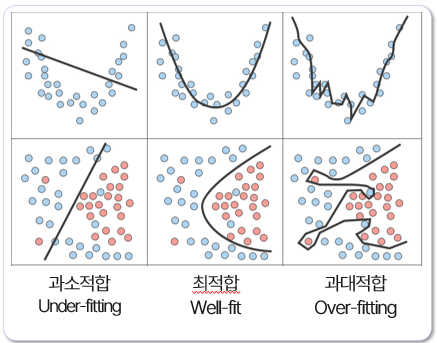

- 어떻게 일반화의 상태를 파악: 선험적(계산적)으로는 거의 불가 → **실험**에 근간을 둔 방법
  
  ⇒ 모델이 투입이 되는 상황에 맞춰어 **평가(Test) 체계**를 만들고, 이에 맞추어 모델을 **검증(Validation)**
  
  ⇒ 속성 공학 - 파생 변수 생성, 차원 축소, 스캐일링, ... 
  
  ⇒ 최적합 모델을 도출 - 모델 튜닝, 앙상블, ...


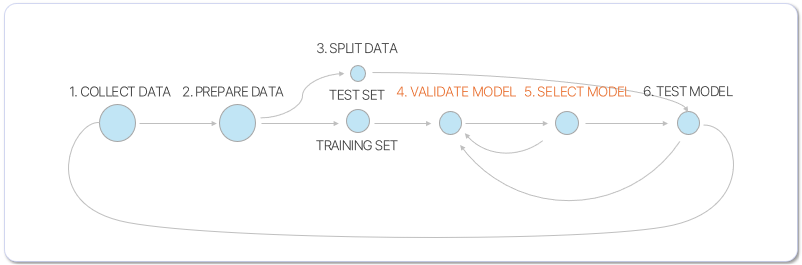

### 검증: 일반화 성능을 측정

- 진행 방식

| 방식 | 설명 |
| --- | --- |
| 홀드아웃 검증<br/>Hold-out Validation | 검증용 학습 데이터와 검증용 테스트 데이터(검증 데이터) 한 번의 성능 측정 결과로 검증<br/>결과의 편차가 적을 때 사용 |
| 교차 검증<br/>Cross Validation | K 개의 조각으로 데이터를 나누어 1 번씩 검증 데이터로 번갈아 가며 K 번의 성능 평균으로 검증<br/>결과의 편차를 낮춤 |
| 반복 검증<br/>Repeated Validation | 반복적으로 홀드아웃 또는 교차 검증을 수행하고 각 수행의 평균으로 결과 산출(Monte-Carlo Validation)<br/>결과의 편차를 더욱 낮춤 |

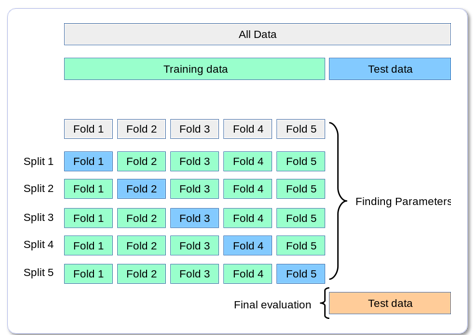

-  분리 방식
|   | 설명 |
| --- | --- |
| 단순 분리<br/>Simple Split | 자료의 순서를 기준으로 전후 분리 |
| 무작위 분리<br/>Shuffle Split | 데이터 혼합 후 위치를 기준으로 분리 |
| 계층적 분리<br/>Stratified Split | 지정한 범주형 변수의 범주 비율을 동일하게 분리<br/>대상 변수의 구성 비율에 따라 성능의 편차가 클 때 |
| 그룹화 분리<br/>Grouped Spilt | 지정한 범주형 변수가 동일한 것끼리 그룹화하고, 동일 그룹은 분리가 되지 않게 그룹 단위 분리<br/>신규 범주에 대한 예측 |
| 시계열 분리<br/>Time Series Split | 시점을 기준으로 분리<br/>학습 데이터 이후 데이터와의 편차에 대한 대응도 확인 |

#### 검증 방식 예제
- Simple Split + 4 Fold Cross Validation

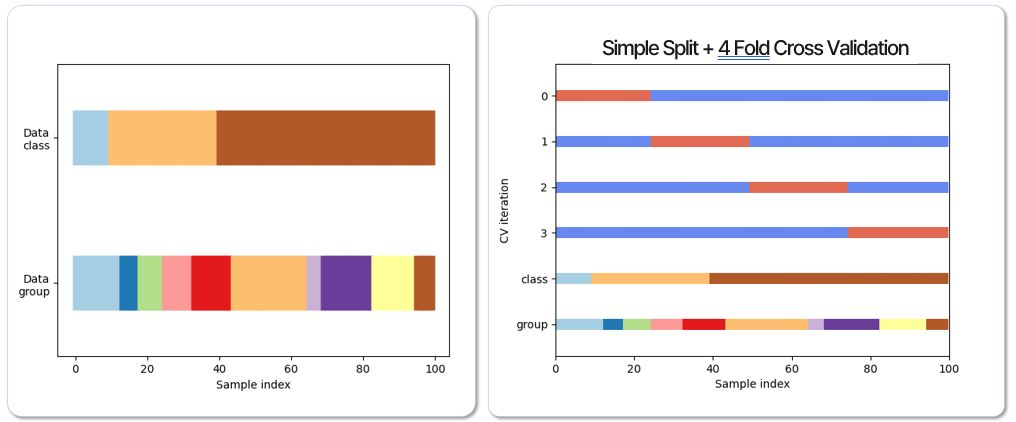

- Shuffle Split + 4 Fold Cross Validation

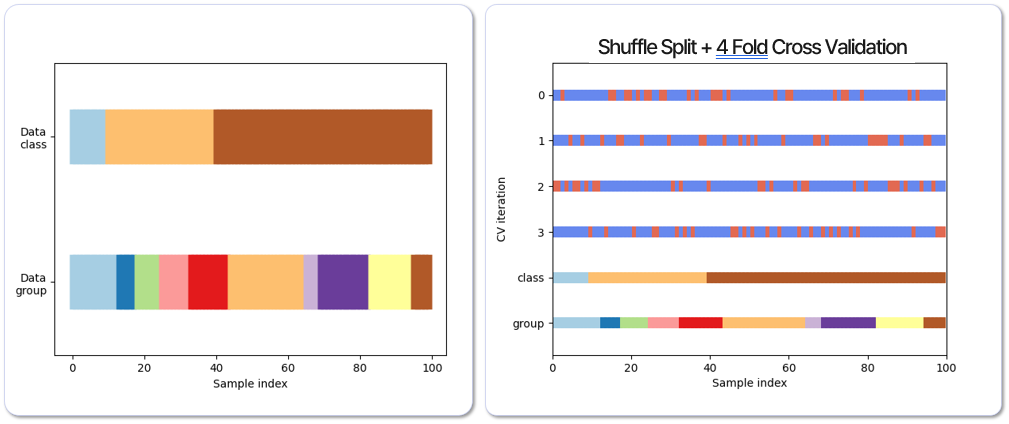

- Stratified Simple Split + 4 Fold Cross Validation

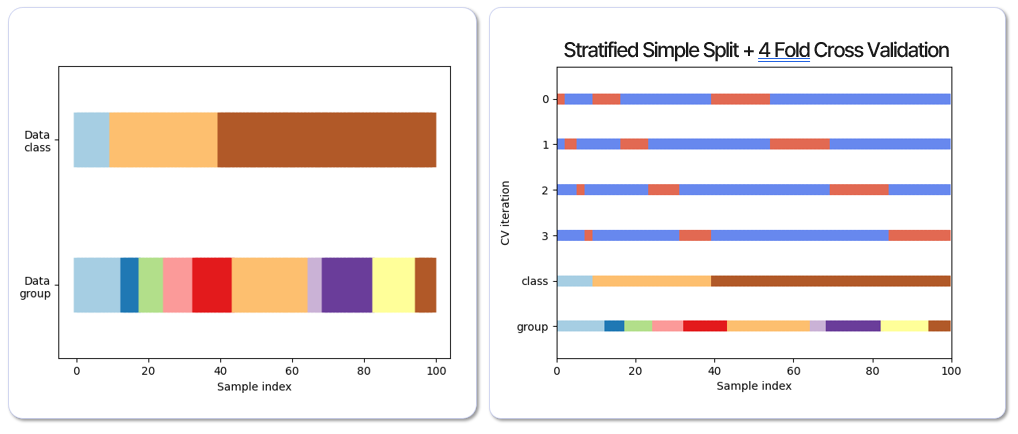

#### 모델 선택 과정

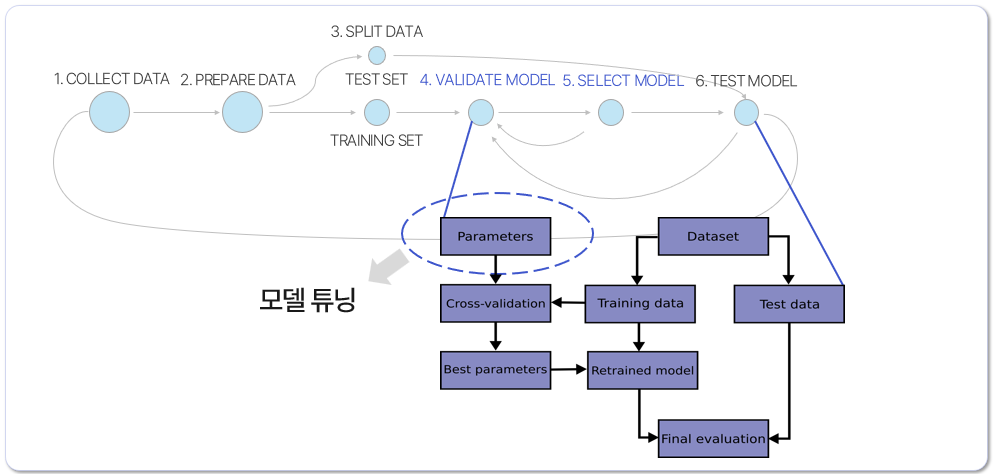

출처: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

※ 머신 러닝 모델의 일반화 성능 측정은 **실험**을 통해 가능 → **점진적 고도화 필수**

## 규제(Regularization)

머신 러닝 모델의 일반화를 위해 모델의 학습 데이터에 지나치게 치우치는 것을 제어하기 위한 방법

### 모수적 모델의 규제

- 모수가 지나치게 커지지 않게 제약을 걸어 주는 방법

- 규제 방식

|   | 규제함수 |
| --- | --- |
| L1 규제<br/>(L1 Regularization) |$$\sum_{i=1}^k|\beta_i|$$|
| L2 규제<br/>(L2 Regularization) |$$\sum_{i=1}^k\beta_i^2$$|

- L1 규제 적용
> 손실함수에 규제 계수와 함께 가산
> 
> EX) $\text{Loss}=\sum_{i=1}^n(y_i-\hat{y}_i)^2$

- L1 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{k} |\beta_i|$

- L2 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{i=1}^{k} \beta_i^2$

#### L1 규제 vs L2 규제
- L1 규제: 모수를 0 으로 만들게 하는 성질이 강함
- L2 규제: 모수가 지나치게 커지지 않게 만들면서, 완전히 0 이 되지는 않게 함


|  | 단일 변수 규제함수 | 1차 도함수 |
|---|---|---|
| L1 규제<br>(L1 Regularization) | $$\|\beta_i\|$$ | $$\begin{cases} if\ \beta_i > 0, 1 \\ if\ \beta_i = 0, \text{미분불가} \\ if\ \beta_i < 0, -1 \end{cases}$$ |
| L2 규제<br>(L2 Regularization) | $$\beta_i^2$$ | $$\beta_i$$ |

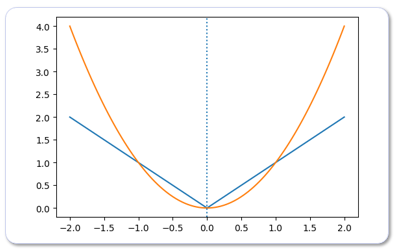

#### 규제가 적용된 선형회귀모델

|  | Ridge | Lasso | Elastic Net |
|---|---|---|---|
| 규제 | L2 규제 | L1 규제 | L1, L2 규제 |
| 손실 함수 | $$\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda\sum_{i=1}^{k}\beta_i^2$$|$$\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\|$$ |$$\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\| + \lambda\sum_{i=1}^{k}\beta_i^2$$|
| 수식 기반 추정 | $$(X^TX - \lambda I)^{-1}X^Ty$$ | 불가 | 불가 |
| 효과 | 안정화, 분산 감소, 다중공선성 완화 | 변수 선별 | Ridge + Lasso |

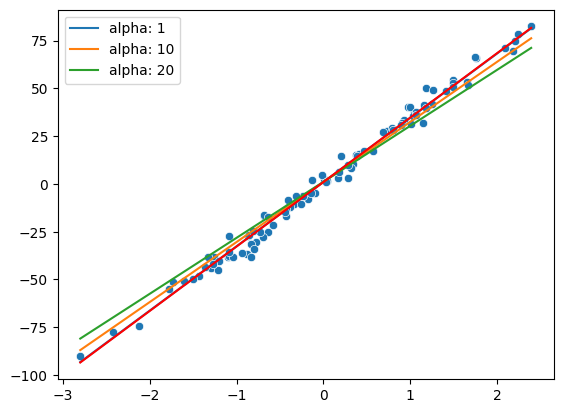

In [37]:
from sklearn.linear_model import Ridge

sns.scatterplot(x = X[:, 0], y = y)
# 규제의 강도(1, 10, 20)에 따른 선형 회귀선을 출력합니다.
for alpha in [1, 10, 20]:
    reg_rd = Ridge(alpha=alpha)
    reg_rd.fit(X, y)
    plot_linear_model(X[:, 0].min(), X[:, 0].max(), np.array([reg_rd.coef_[0], reg_rd.intercept_]), label='alpha: {}'.format(alpha))
    y_hat = reg_rd.predict(X)
    losses.append(np.mean(np.square(y - y_hat)))
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

## 용어 정의

> 대상 변수(Target Variable) - 지도학습에서 정답에 해당하는 변수
>
> 입력 변수(Input Variable) - 기계학습 모델에 입력 변수
>
> 모수 (Parameter) - 모집단이 지니는 특징을 나타내는 수. 모평균 / 모분산 ...
>
> 가중치 (Weight) - 인공신경망에서의 모수(Parameter)
>
> 손실 (Loss) - 모델링을 통해서 발생한 실제 현상에 대한 정보 손실


# 머신러닝 맛보기

## 실습: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자별 영화 평점 예측기를 만들어 봅시다. 

지표: R2

$1-\sum_{i=1}^{N} \frac{(y_i-\hat{y})^2}{(y_i-\bar{y})^2}$

0~1 (1에 가까울수록 우수) 

>  ML 모델의 예측력을 Rating이 지닌 변동성 기준으로 나타냄

학습데이터:평가데이터 = 8:2


In [38]:
from sklearn.model_selection import train_test_split
# 학습:평가 = 8:2로 하여 학습/평가를 셋을 합니다.
df_train, df_test = train_test_split(df_ratings, train_size=0.8, random_state=123)

### **선형 회귀**모델을 이용한 초간단 평점 예측 모델

MovieLens 100K에서  80%는 학습, 20%는 평가데이터로 구성합니다. 

입력변수: 사용자의 rating 평균, 영화의 rating 평균

로 하여 rating(평점)을 맞추는 선형회귀 모델을 학습하고 평가해봅니다.

In [39]:
from sklearn.model_selection import train_test_split
# 학습:평가 = 8:2로 하여 학습/평가를 셋을 합니다.
df_train, df_test = train_test_split(df_ratings, train_size=0.8, random_state=123)

In [40]:
df_train.shape, df_test.shape

((80000, 4), (20000, 4))

**TargetEncoder**

범주형 변수를 수준별 대상값에 대한 평균으로 인코딩해주는 전처리기 입니다.

In [41]:
from sklearn.preprocessing import TargetEncoder
tgt = TargetEncoder(target_type = "continuous")
tgt.fit(df_train[['user id', 'item id']], df_train['rating'])

,"categories categories: ""auto"" or list of shape (n_features,) of array-like, default=""auto""Categories (unique values) per feature:- `""auto""` : Determine categories automatically from the training data.- list : `categories[i]` holds the categories expected in the i-th column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories are stored in the `categories_` fitted attribute.",'auto'
,"target_type target_type: {""auto"", ""continuous"", ""binary"", ""multiclass""}, default=""auto""Type of target.- `""auto""` : Type of target is inferred with :func:`~sklearn.utils.multiclass.type_of_target`.- `""continuous""` : Continuous target- `""binary""` : Binary target- `""multiclass""` : Multiclass target.. note:: The type of target inferred with `""auto""` may not be the desired target type used for modeling. For example, if the target consisted of integers between 0 and 100, then :func:`~sklearn.utils.multiclass.type_of_target` will infer the target as `""multiclass""`. In this case, setting `target_type=""continuous""` will specify the target as a regression problem. The `target_type_` attribute gives the target type used by the encoder... versionchanged:: 1.4 Added the option 'multiclass'.",'continuous'
,"smooth smooth: ""auto"" or float, default=""auto""The amount of mixing of the target mean conditioned on the value of thecategory with the global target mean. A larger `smooth` value will putmore weight on the global target mean.If `""auto""`, then `smooth` is set to an empirical Bayes estimate.",'auto'
,"cv cv: int, default=5Determines the number of folds in the :term:`cross fitting` strategy used in:meth:`fit_transform`. For classification targets, `StratifiedKFold` is usedand for continuous targets, `KFold` is used.",5
,"shuffle shuffle: bool, default=TrueWhether to shuffle the data in :meth:`fit_transform` before splitting intofolds. Note that the samples within each split will not be shuffled.",True
,"random_state random_state: int, RandomState instance or None, default=NoneWhen `shuffle` is True, `random_state` affects the ordering of theindices, which controls the randomness of each fold. Otherwise, thisparameter has no effect.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [42]:
df_train[['user id', 'item id']]

,user id,item id
22302,429,24
49609,480,511
89251,916,746
96385,892,196
17569,90,83
...,...,...
63206,717,678
61404,811,258
17730,92,22
28030,389,483


In [43]:
pd.DataFrame(
    tgt.transform(df_train[['user id', 'item id']]), columns = ['user id', 'item id']
).head(5)

,user id,item id
0,3.393031,3.430114
1,3.724876,4.233840
2,3.386813,3.629729
3,3.986845,3.882081
4,4.176012,4.019813


In [44]:
# TargetEncoder 내부에는 평균을 보정하는 작업에 의한 미세한 차이가 있습니다.
# pandas 를 이용해 구현해봅니다.
pd.concat([
    df_train.groupby('user id')['rating'].transform('mean').rename('user id'), 
    df_train.groupby('item id')['rating'].transform('mean').rename('item id')
], axis = 1).head(5)

,user id,item id
22302,3.392749,3.429577
49609,3.727273,4.237037
89251,3.386454,3.630435
96385,3.988571,3.883249
17569,4.177966,4.022059


**Pipeline**

단계별 데이터 처리 과정들을 결합하여 하나의 모델로 만듭니다.

Ex) TargetEncoder + LinearRegression

In [45]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

X_lr = ['user id', 'item id']
# 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
# 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
# 선형 회귀 모델 
reg_lr = make_pipeline(
    TargetEncoder(target_type = 'continuous'), LinearRegression()
)
# 학습
reg_lr.fit(df_train[X_lr], df_train['rating'])
# 예측
reg_lr.predict(df_test[X_lr])

array([3.98937686, 4.02656927, 4.20767457, ..., 4.06794652, 3.78844981,
       2.60148707], shape=(20000,))

In [46]:
from sklearn.metrics import r2_score # R2 구하는 함수

r2_score(
    df_test['rating'], reg_lr.predict(df_test[X_lr])
)

0.27522918711870115

**5-fold cross validation**

예제를 통해 이해해 봅니다.

In [47]:
# 처음 5개의 셋만 가져옵니다.
df_train_5 = df_train.iloc[:5]
df_train_5

,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
cv = KFold(5, random_state=1, shuffle=True)
cnt = 1
scores = list()
reg_lr = make_pipeline(
    TargetEncoder(target_type = 'continuous', cv = 4), LinearRegression()
)
for train_idx, test_idx in cv.split(df_train_5):
    df_cv_train = df_train_5.iloc[train_idx] # 검증 학습셋
    print("검정 학습셋: {}".format(cnt))
    display(df_cv_train)
    reg_lr.fit(df_cv_train[X_lr], df_cv_train['rating'])

    print("검정  테스트셋: {}".format(cnt))
    df_cv_test = df_train_5.iloc[test_idx] # 검증 테스트셋
    prd = reg_lr.predict(df_cv_test[X_lr]) # 예측합니다.
    display(df_cv_test)
    score = mean_squared_error(df_cv_test['rating'], prd) # 지표 측정합니다.
    scores.append(score)
    print('Validation #{}, MSE: {:.5}'.format(cnt, score)) # 검정 라운드별 성능을 출혁합니다.
    cnt += 1
print(scores, np.mean(scores))

검정 학습셋: 1


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 1


,user id,item id,rating,date
89251,916,746,3,1997-11-29 22:57:42


Validation #1, MSE: 1.0
검정 학습셋: 2


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 2


,user id,item id,rating,date
49609,480,511,4,1998-03-29 21:56:39


Validation #2, MSE: 0.0625
검정 학습셋: 3


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02


검정  테스트셋: 3


,user id,item id,rating,date
17569,90,83,5,1998-03-31 22:34:47


Validation #3, MSE: 2.25
검정 학습셋: 4


,user id,item id,rating,date
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 4


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29


Validation #4, MSE: 1.0
검정 학습셋: 5


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 5


,user id,item id,rating,date
96385,892,196,4,1998-02-04 16:27:02


Validation #5, MSE: 0.0625
[0.9999999999999964, 0.0625, 2.25, 0.9999999999999964, 0.0625] 0.8749999999999986


**sklearn.model_selection.cross_validate**

상기의 과정을 함수로 구현한 것입니다.

In [49]:
from sklearn.model_selection import KFold, cross_validate
# 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
# 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
# 선형 회귀 모델 
reg_lr = make_pipeline(
    TargetEncoder(target_type = 'continuous'), LinearRegression()
)
X_lr = ['user id', 'item id']
# 5 fold cross validate를 해봅니다. 지표는 r2_score 사용합니다. #r2, neg_mean_squared_error
result = cross_validate(
    reg_lr, df_train[X_lr], df_train['rating'], scoring = 'r2', cv = cv, return_train_score = True
)
np.mean(result['test_score']), np.mean(result['train_score'])

(np.float64(0.2719764148206641), np.float64(0.32249411191410327))

In [50]:
# 모델 검증 프로세스부터 구현합니다.
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import r2_score

# 5-fold cross validate splitter를 설정합니다. random_state=123, shuffle=True
cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model(model, df, X):
    # cross_validate를 활용하여 R2 Score를 지표로하고 Splitter는 5-fold cross validate, train_score까지 반환토록하여 model 성능을 측정합니다.
    # scoring = 'r2', 
    return cross_validate(
        model, df[X], df['rating'], scoring = 'r2', cv = cv, return_train_score = True
    )

In [51]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

X_lr = ['user id', 'item id']
# user id, item id에 대한 Target Encoder 를 설정합니다.. target_type = 'continuous': target이 연속형 변수
# Target Encoder와 Linear Regression을 결합합니다.
reg_lr = make_pipeline(
    TargetEncoder(target_type = 'continuous'),
    LinearRegression()
)
result = eval_model(reg_lr, df_train, X_lr)
result, np.mean(result['test_score'])

({'fit_time': array([0.03019738, 0.03044248, 0.02955747, 0.02778864, 0.03647614]),
  'score_time': array([0.00378513, 0.00397944, 0.00364566, 0.00373006, 0.00370336]),
  'test_score': array([0.27164778, 0.27549445, 0.27217527, 0.2648595 , 0.28173046]),
  'train_score': array([0.32347558, 0.32220873, 0.32303039, 0.32349812, 0.31983884])},
 np.float64(0.27318149133448416))

In [52]:
from sklearn.metrics import r2_score
# reg_lr을 rating에 대해 학습시킵니다.
reg_lr.fit(df_train[X_lr], df_train['rating'])
# df_test의 rating을 예측하고, 정답과의 r2_score를 구합니다.
r2_score(
    df_test['rating'], reg_lr.predict(df_test[X_lr])
)

0.27521843551615566

### 실습: 사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 rating  예측 모델의 기능을 추가해봅니다.

직업과 성별은 OneHotEncoder를 사용합니다. 

그리고 장르는 장르의 해당 여부를 그대로 전달합니다.

In [53]:
# gender, occupation을 활용하기 위에 df_user와 결합합니다.
# genre를 활용하기 위해 df_movie와 결합합니다.
df_train_2 = df_train.join(
    df_user[['gender', 'occupation']], on = 'user id'
).join(
    df_movie.iloc[:, 2:], on = 'item id'
)
df_test_2 = df_test.join(
    df_user[['gender', 'occupation']], on = 'user id'
).join(
    df_movie.iloc[:, 2:], on = 'item id'
)
df_train_2.head()

,user id,item id,rating,date,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
22302,429,24,3,1997-12-17 19:18:29,M,student,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
49609,480,511,4,1998-03-29 21:56:39,M,retired,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
89251,916,746,3,1997-11-29 22:57:42,M,engineer,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96385,892,196,4,1998-02-04 16:27:02,M,other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17569,90,83,5,1998-03-31 22:34:47,M,educator,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**OneHotEncoder**

범주형 변수를 수준에 해당하면 1, 그렇지 않으면 0으로 하여 인코딩할 수준 만큼 가변수를 만들어 냅니다.

Ex) 
|gender|
|----|
|M|
|F|
|...|

→ 가변수화

|gender_M|gender_F|
|---|----|
|1|0|
|0|1|
|...|

In [55]:
display(df_user.iloc[:5][['gender']])
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(df_user[['gender']])
pd.DataFrame(
    ohe.transform(df_user[['gender']]),
    columns=ohe.get_feature_names_out(['gender'])
)

,gender
user id,
1,M
2,F
3,M
4,M
5,F


,gender_F,gender_M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
938,1.0,0.0
939,0.0,1.0
940,0.0,1.0
941,1.0,0.0


**ColumnTransformer**

변수별 전처리를 지정할 수 있게합니다. 

|전처리기|변수|
|----|-------|
|TargetEncoder|user id, item id|
|OneHotEncoder|occupation, gender|
|passthrough(통과)|genre 컬럼|

In [56]:
X_genre = df_movie.columns[2:].tolist()
X_genre

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [57]:
ct = ColumnTransformer([
    # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    ('tgt', TargetEncoder(target_type = 'continuous'), ['user id', 'item id']), 
    ('ohe', OneHotEncoder(drop='first'), ['gender', 'occupation']), # 직업, 성별은 가변수화 합니다. 선형회귀분석을 사용하므로 다중공선성문제를 피하기 위해 수준 하나를 제외하고 가변수화 합니다.
    ('pt', 'passthrough', X_genre) # Genre 여부는 그대로 모델에 전달합니다.
])
X_lr_2 = ['user id', 'item id'] + ['occupation', 'gender'] + X_genre
# ColumnTransformer의 변환과 출력 결과를 DataFrame으로 정리해봅니다.
ct.fit(df_train_2[X_lr_2], df_train_2['rating'])
pd.DataFrame(
    ct.transform(df_train_2[X_lr_2]), columns = ct.get_feature_names_out()
).head()

,tgt__user id,tgt__item id,ohe__gender_M,ohe__occupation_artist,ohe__occupation_doctor,ohe__occupation_educator,ohe__occupation_engineer,ohe__occupation_entertainment,ohe__occupation_executive,ohe__occupation_healthcare,...,pt__Fantasy,pt__Film-Noir,pt__Horror,pt__Musical,pt__Mystery,pt__Romance,pt__Sci-Fi,pt__Thriller,pt__War,pt__Western
0,3.393031,3.430114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.724876,4.233840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.386813,3.629729,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.986845,3.882081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.176012,4.019813,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
# ColumnTransformer -변수별 인코딩 방법을 달리 구성하여 처리 단계를 만듭니다.
ct = ColumnTransformer([
    # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    ('tgt', TargetEncoder(target_type = 'continuous'), ['user id', 'item id']), 
    ('ohe', OneHotEncoder(drop='first'), ['gender', 'occupation']), # 직업, 성별은 가변수화 합니다. 선형회귀분석을 사용하므로 다중공선성문제를 피하기 위해 수준 하나를 제외하고 가변수화 합니다.
    ('pt', 'passthrough', X_genre) # Genre 여부는 그대로 모델에 전달합니다.
])
# ColumnTransformer와 LinearRegression을 연결합니다.
reg_lr_2 = make_pipeline(
    ct, LinearRegression()
)
X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
# eval model에 전달하여 검증 결과를 얻어 옵니다.
result = eval_model(reg_lr_2, df_train_2, X_lr_2)
result, np.mean(result['test_score']) # Baseline: 0.2731

({'fit_time': array([0.16599083, 0.14657855, 0.14722562, 0.15079594, 0.1492939 ]),
  'score_time': array([0.02169013, 0.02375841, 0.02332878, 0.02211237, 0.02008152]),
  'test_score': array([0.27376365, 0.27723366, 0.27378919, 0.26856752, 0.28518458]),
  'train_score': array([0.32512974, 0.324194  , 0.32468993, 0.32570599, 0.32168313])},
 np.float64(0.27570772003865474))

In [59]:
from sklearn.metrics import r2_score
# 평가를 진행합니다.
# reg_lr_2 모델을 df_train_2 전체셋으로 학습합니다.
reg_lr_2.fit(df_train_2[X_lr_2], df_train_2['rating'])
# df_test_2 에 대해서 rating 예측을 하고, R2를 측정합니다.
r2_score(
    df_test_2['rating'], reg_lr_2.predict(df_test_2[X_lr_2])
) # 0.2751

0.27718621608166616

### 로지스틱 회귀 (Logistic Regression Model)

선형 회귀 모델로 로지스틱 함수를 통해 \[0, 1\] 실수 영역 즉 확률의 영역을 예측하도록 한 선형 모델

즉, 분류 문제를 선형회귀 모델로 풀 수 있도록 변경한 모델. 

로짓 함수: [0, 1] 확률 영역의 실수를 [-∞, ∞]로 변환해주는 함수

  > $logit(p)= \log(\frac{p}{1-p})$

로지스틱 함수: [-∞, ∞] 실수를 [0, 1] 확률 영역의 실수로 변환해주는 함수: 로짓함수의 역함수

  > $logistic(x)= \frac{1}{1 + e^{-x}}$

SoftMax  함수: 다중클래스 분류를 위한 링크(link)함수

  > $softmax(x_i) = \frac{e^{x_i}}{\sum_j{e^{x_j}}}$, $x_i$는 i클래스의 로짓
  
손실 함수: Cross Entropy

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$(이진 분류)
  
학습 알고리즘: 경사하강법

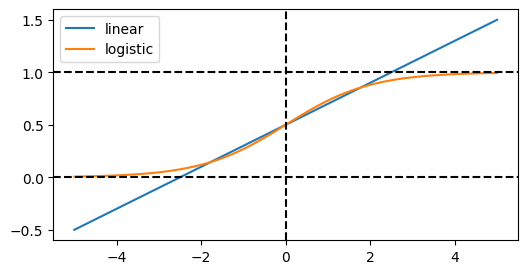

In [60]:
# logistic 함수를 출력해봅니다.

from scipy.special import expit
plt.figure(figsize=(6, 3))
x = np.linspace(-5, 5, 100)
sns.lineplot(x = x, y =  x / 5 + 0.5, label='linear')
sns.lineplot(x = x, y = expit(x), label='logistic')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='black', linestyle='--')
plt.show()

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자가 영화에 평점 여부를 맞추는 모델을 만듭니다.

지표: AUC(Area Under of ROC Curve)

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation

**로지스틱 회귀**분석을 이용한 초간단 모델을 만들어 봅니다.

입력변수: 사용자의 rating을 한 비율, 영화의 rating을 받은 비율

In [61]:
df_ratings

,user id,item id,rating,date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


In [62]:
# 1. user id와 item id를 cross tab을 하여 사용자별 평가 내역이 있으면 1, 없으면 0인 DataFrame을 만듭니다.
# 2. 이를 stack 하여 user id별 item id에 대한 시청 유무를 나타내는 데이터프레임으로 변환합니다.
df_ratings_yn = df_ratings.pivot(
    index = 'user id', columns = 'item id', values = 'rating'
).notna().stack().rename('yn').reset_index()
df_ratings_yn.head()

,user id,item id,yn
0,1,1,True
1,1,2,True
2,1,3,True
3,1,4,True
4,1,5,True


In [63]:
df_ratings_yn.shape, df_ratings_yn['yn'].value_counts()

((1586126, 3),
 yn
 False    1486126
 True      100000
 Name: count, dtype: int64)

In [64]:
# 학습셋 8, 평가셋 2의 비율로 나눕니다.
df_train_yn, df_test_yn = train_test_split(df_ratings_yn, train_size=0.8, random_state=123)

In [65]:
# 이진 분류에 대한 타겟 인코딩으로 설정합니다.
# Positive인 비율로 인코딩 됩니다.
tgt = TargetEncoder(target_type = 'binary')
tgt.fit(df_train_yn[['user id', 'item id']], df_train_yn['yn'])
tgt.transform(df_train_yn[['user id', 'item id']])

array([[0.07965053, 0.0116108 ],
       [0.1361186 , 0.01413546],
       [0.02504838, 0.06181485],
       ...,
       [0.0147146 , 0.06459743],
       [0.0104235 , 0.19952608],
       [0.04559769, 0.00133163]], shape=(1268900, 2))

In [66]:
pd.concat([
    df_train_yn.groupby(i)['yn'].transform('mean').rename(i)
    for i in ['user id', 'item id']
], axis = 1).head()

,user id,item id
1191215,0.079666,0.011598
347585,0.136228,0.014121
728980,0.025037,0.061813
1558868,0.075515,0.009272
1305487,0.018462,0.015666


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf_lr = make_pipeline(
    TargetEncoder(target_type = 'binary'), LogisticRegression()
)
clf_lr.fit(df_train_yn[['user id', 'item id']], df_train_yn['yn'])
roc_auc_score(
    df_train_yn['yn'], clf_lr.predict_proba(df_train_yn[['user id', 'item id']])[:, 1]
)

0.8815597581195409

In [68]:
roc_auc_score(
    df_test_yn['yn'], clf_lr.predict_proba(df_test_yn[['user id', 'item id']])[:, 1]
)

0.8789587318391311

**검증 루틴을 만들어 봅니다.**

In [69]:
# 모델 검증 프로 루틴입니다.
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate
from sklearn.metrics import roc_auc_score

# 5겹 교차 검증을 세팅합니다.
kf = KFold(n_splits=5, random_state=123, shuffle=True)
skf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
def eval_model_yn(model, df, X, cv = skf):
    # roc_auc_score를 지표로하는 평가 루틴을 만듭니다. 
    result = cross_validate(
        model, df[X], df['yn'], scoring = 'roc_auc', cv = cv, return_train_score = True
    )
    return result

**모델 인스턴스를 만듭니다.**

sklearn.linear_model.LogisticRegression을 활용해 봅니다.

In [70]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

clf_lr = make_pipeline(
    TargetEncoder(target_type = 'binary'), # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    LogisticRegression() # 로지스틱 회귀모델
)
X_lr = ['user id', 'item id']

In [71]:
# 모델을 평가해봅니다.
result = eval_model_yn(clf_lr, df_train_yn, X_lr, cv = kf)
result, np.mean(result['test_score']), np.std(result['test_score'])

({'fit_time': array([1.41418004, 1.40163183, 1.69661283, 1.37661815, 1.37985897]),
  'score_time': array([0.10539031, 0.10915613, 0.1059382 , 0.10267735, 0.11117148]),
  'test_score': array([0.87967127, 0.87736982, 0.87885182, 0.87969292, 0.87717492]),
  'train_score': array([0.88191312, 0.88203217, 0.88176525, 0.88158724, 0.88212991])},
 np.float64(0.8785521485313886),
 np.float64(0.0010897948653038438))

In [72]:
# 모델을 평가해봅니다.
result = eval_model_yn(clf_lr, df_train_yn, X_lr, cv = skf)
result, np.mean(result['test_score']), np.std(result['test_score'])

({'fit_time': array([1.45519066, 1.47596312, 1.37260962, 1.46510959, 1.40070009]),
  'score_time': array([0.10225058, 0.109339  , 0.10459089, 0.11520624, 0.10863638]),
  'test_score': array([0.87878734, 0.8798173 , 0.87744456, 0.87859697, 0.87833391]),
  'train_score': array([0.88191679, 0.8813736 , 0.88220595, 0.88191885, 0.88198948])},
 np.float64(0.8785960160907342),
 np.float64(0.000764552715056088))

In [73]:
from sklearn.metrics import roc_auc_score
# reg_lr을 df_train_yn 'yn'을 예측하도록 학습시킵니다.
clf_lr.fit(df_train_yn[X_lr], df_train_yn['yn'])
# df_test_yn의 'yn'이 Positive일 확률을 예측하여 AUC를 측정합니다.
roc_auc_score(
    df_test_yn['yn'], clf_lr.predict_proba(df_test_yn[X_lr])[:, 1]
)

0.8789588607033161

**실습**

사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 yn  예측 모델의 기능을 추가해봅니다.

In [74]:
X_genre = df_movie.columns[2:].tolist()
X_genre

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [75]:
# gender, occupation을 활용하기 위에 df_user와 결합합니다.
# genre를 활용하기 위해 df_movie와 결합합니다.
df_train_yn_2 = df_train_yn.join(df_user[['occupation', 'gender']], on = 'user id').join(df_movie[X_genre], on = 'item id')
df_test_yn_2 = df_test_yn.join(df_user[['occupation', 'gender']], on = 'user id').join(df_movie[X_genre], on = 'item id')

In [76]:
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    ('tgt', TargetEncoder(target_type = 'binary'), ['user id', 'item id']), 
    ('ohe', OneHotEncoder(drop='first'), ['gender', 'occupation']), # 직업과 성별의 가변수를 첫번째 범주를 제외시켜 추가합니다.
    ('pt', 'passthrough', X_genre),  # 장르 정보는 직접 사용가능하므로 통과 시킵니다.
])

# ct와 Logistic Regression 결합한 모델 reg_lr_2를 만듭니다.
clf_lr_2 = make_pipeline(ct, LogisticRegression())
X_lr_2 = ['user id', 'item id'] + ['occupation', 'gender'] + X_genre
result = eval_model_yn(clf_lr_2, df_train_yn_2, X_lr_2, cv = skf)
result, np.mean(result['test_score']) # 0.8786 # [0.88193565, 0.88137388, 0.88220328, 0.8819267 , 0.88199358]

({'fit_time': array([3.98645949, 3.92374468, 4.24811244, 3.97818589, 3.63562298]),
  'score_time': array([0.32780647, 0.33508825, 0.33579683, 0.32674551, 0.32937646]),
  'test_score': array([0.87729208, 0.87852985, 0.87440628, 0.87630553, 0.87645278]),
  'train_score': array([0.8798939 , 0.87941521, 0.88003937, 0.87989572, 0.87985244])},
 np.float64(0.8765973031625244))

In [77]:
from sklearn.metrics import roc_auc_score
# df_train_yn_2로 reg_lr_2을 yn을 예측하도록 학습 시킵니다.
clf_lr_2.fit(df_train_yn_2[X_lr_2], df_train_yn_2['yn'])
# df_test_yn_2를 reg_lr_2로 yn이 True일 확률을 맞추도록 학습시킵니다.
roc_auc_score(
    df_test_yn_2['yn'], clf_lr_2.predict_proba(df_test_yn_2[X_lr_2])[:, 1]
) # 0.8789

0.8764705677339938

In [78]:
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    ('tgt', TargetEncoder(), ['user id', 'item id']), 
    ('ohe', OneHotEncoder(drop='first'), ['gender', 'occupation']), # 직업과 성별의 가변수를 첫번째 범주를 제외시켜 추가합니다.
    ('pt', 'passthrough', X_genre),  # 장르 정보는 직접 사용가능하므로 통과 시킵니다.
])

# ct와 Logistic Regression 결합한 모델 reg_lr_2를 만듭니다.
clf_lr_2 = make_pipeline(ct, LogisticRegression(C=100)) # 비교군 만큼의 학습 성능을 끌어 올리기 위해 Capacity를 높여 봅니다.
X_lr_2 = ['user id', 'item id'] + ['occupation', 'gender'] + X_genre
result = eval_model_yn(clf_lr_2, df_train_yn_2, X_lr_2, cv = skf)
result, np.mean(result['test_score']) # 0.8786 # [0.88193565, 0.88137388, 0.88220328, 0.8819267 , 0.88199358] # 개선이 없습니다.

({'fit_time': array([4.45708394, 4.02758479, 3.8742044 , 4.61467171, 4.15740561]),
  'score_time': array([0.33948255, 0.33519268, 0.34463406, 0.34972048, 0.32937026]),
  'test_score': array([0.87729788, 0.87836723, 0.87447227, 0.87625277, 0.87641118]),
  'train_score': array([0.87989411, 0.87925337, 0.880102  , 0.87985149, 0.87982076])},
 np.float64(0.8765602670748333))

In [79]:
from sklearn.metrics import roc_auc_score
# df_train_yn_2로 reg_lr_2을 yn을 예측하도록 학습 시킵니다.
clf_lr_2.fit(df_train_yn_2[X_lr_2], df_train_yn_2['yn'])
# df_test_yn_2를 reg_lr_2로 yn이 True일 확률을 맞추도록 학습시킵니다.
roc_auc_score(
    df_test_yn_2['yn'], clf_lr_2.predict_proba(df_test_yn_2[X_lr_2])[:, 1]
) # 0.8789

0.8764323260253892